# 파이썬으로 데이터마이닝 시작하기
## 제 6 장 - 회귀와 분류를 이용한 예측
### Copyright: Nathan Greeneltch, PhD 2019

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")

# 회귀

## 회귀 예제 데이터

In [3]:
# 모듈 임포트
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [4]:
ds = fetch_california_housing(as_frame=True)
ds_df = pd.DataFrame(ds.data, columns=ds.feature_names)
print(ds.frame.columns)
print(ds.data.columns)
print(ds_df.columns)
print(ds_df.shape)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
(20640, 8)


In [5]:
ds.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
ds.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
ds_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
ds.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [9]:
ds.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
# 훈련/테스트 데이터로 나눠진 california_housing 데이터를 구하는 함수
def get_california_housing():
    # california_housing 데이터셋 불러오기
    dataset = fetch_california_housing()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['MedHouseVal'] = dataset.target
    df.index.name = 'record'
           
    # 훈련 데이터셋과 테스트 데이터셋으로 나누기
    X_train, X_test, y_train, y_test = \
        train_test_split(df.loc[:, df.columns != 'MedHouseVal'], 
                         df['MedHouseVal'], test_size=.33, random_state=42)

    return [X_train, X_test, y_train, y_test]

## 선형 회귀

In [11]:
### 선형 회귀 ###
# 모듈 임포트
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 훈련 데이터셋과 테스트 데이터셋으로 나누기
X_train, X_test, y_train, y_test = get_california_housing()

# 회귀 객체 초기화와 훈련 데이터에 대한 적합
clf = LinearRegression()
clf.fit(X_train, y_train)

# 테스트 데이터에서의 예측과 y_test에 대한 예측의 점수화
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.5970494128783947


## 패널티 회귀를 활용한 규제화(Regularization)

In [12]:
### 라쏘(Lasso) 회귀 ###
# 모듈 임포트
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# 훈련 데이터셋과 테스트 데이터셋으로 나누기
X_train, X_test, y_train, y_test = get_california_housing()

# 분류기 객체 초기화와 훈련 데이터에 대한 적합
clf = Lasso(alpha=0.3)
clf.fit(X_train, y_train)

# 테스트 데이터 상에서의 예측과 y_test에 대한 예측 점수화
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

r2 score is = 0.4894376589986018
0.49112080327705887
0.4894376589986018


In [13]:
### 릿지(Ridge) 회귀 ###
# 모듈 임포트
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# 훈련 데이터셋과 테스트 데이터셋으로 나누기
X_train, X_test, y_train, y_test = get_california_housing()

# 분류기 객체 초기화와 훈련 데이터에 대한 적합
clf = Ridge(alpha=0.3)
clf.fit(X_train, y_train)

# 테스트 데이터 상에서의 예측과 y_test에 대한 예측 점수화
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.5970629845342552


# 분류(Classification)

## 직관을 얻기 위한 분류기 예제 공부

이 장의 나머지 부분에서는 예측에 사용되는 흔한 기법들을 다룰 것이다. 아래 그림은 다른 예측 기법들에 사용되는 여러 플롯들을 제시하고, 어떻게 그 플롯들이 입력 데이터를 타깃 변수에 매핑하는지를 보여준다.

In [14]:
from IPython.display import Image
Image("compare_prediction_methods.jpg")

FileNotFoundError: No such file or directory: 'compare_prediction_methods.jpg'

FileNotFoundError: No such file or directory: 'compare_prediction_methods.jpg'

<IPython.core.display.Image object>

## 분류 예제 데이터

In [15]:
# 모듈 임포트
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# 모의 moon 데이터를 얻기 위한 함수
def get_moon_data():
    # 데이터 모음을 생성하고 훈련 데이터와 테스트 데이터로 나누기
    X, y = make_moons(n_samples=150, noise=0.4, random_state=42)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33, random_state=42)
    
    return [X_train, X_test, y_train, y_test]

## 로지스틱 회귀(Logistic Regression)

In [16]:
### 로지스틱 회귀 분류 ###
# 모듈 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# moon 데이터 얻기
X_train, X_test, y_train, y_test = get_moon_data()

# 분류 객체 초기화와 훈련 데이터에 대한 적합
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# 테스트 데이터 상에서의 예측과 y_test에 대한 예측 점수화
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7499999999999999


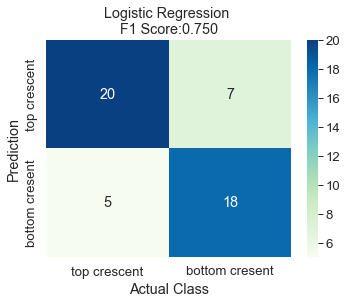

In [17]:
### confusion matrix ###
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# confusion matrix 생성
cm = confusion_matrix(y_pred, y_test) 

# 데이터프레임 생성과 클래스명 부여
labels = ['top crescent', 'bottom cresent']
df_cm = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)

# 플롯 규격 지정
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, cmap="GnBu", annot=True)

# 제목과 축에 대한 레이블 부여
plt.title('Logistic Regression \nF1 Score:{0:.3f}'.format(f1_score(y_test, y_pred)))
plt.ylabel('Prediction')
plt.xlabel('Actual Class')
plt.show()

### 규제화된 로지스틱 회귀(Regularized Logistic Regression)

In [18]:
### 규제화된 로지스틱 회귀(Regularized Logistic Regression) ###
clf = LogisticRegression(solver='lbfgs', penalty='l2', C=0.5)

## 서포트 벡터 머신(Support Vector Machines)

In [19]:
### 서포트 벡터 머신 분류(SVM Classification) ###
# 모듈 임포트
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# moon 데이터 얻기
X_train, X_test, y_train, y_test = get_moon_data()

# 분류 객체 초기화와 훈련 데이터에 대한 적합
clf = SVC(kernel="linear", C=0.5)
clf.fit(X_train, y_train)

# 테스트 데이터 상에서의 예측과 y_test에 대한 예측 점수화
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7499999999999999


### 가우시안 커널 분류를 사용한 서포트 벡터 머신

In [20]:
### 가우시안 커널 분류를 사용한 서포트 벡터 머신 ###
# 분류 객체 초기화와 훈련 데이터에 대한 적합
clf = SVC(gamma=2, C=1)
clf.fit(X_train, y_train)

# 테스트 데이터 상에서의 예측과 y_test에 대한 예측 점수화
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.782608695652174


## 트리 기반 분류

### 의사결정 트리(Decision Tree Classification)

In [21]:
### 의사결정 트리 분류(Decision Tree Classification) ###
# 모듈 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# moon 데이터 얻기
X_train, X_test, y_train, y_test = get_moon_data()

# 분류 객체 초기화와 훈련 데이터에 대한 적합
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터 상에서의 예측과 y_test에 대한 예측 점수화
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7391304347826089


### 랜덤 포레스트(Random Forest)

In [22]:
### 랜덤 포레스트 분류(Random Forest Classification) ###
# 모듈 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# moon 데이터 얻기
X_train, X_test, y_train, y_test = get_moon_data()

# 분류 객체 초기화와 훈련 데이터에 대한 적합
clf = RandomForestClassifier(max_depth=4, n_estimators=4, 
                             max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터 상에서의 예측과 y_test에 대한 예측 점수화
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7755102040816326


#### 랜덤 포레스트 모델의 검증을 위해 OOB 점수 사용하기

In [23]:
### 검증 데이터를 위한 OOB 사용 ###
# 분류 객체 초기화와 훈련 데이터에 대한 적합
clf = RandomForestClassifier(max_depth=4, n_estimators=10, 
                             max_features='sqrt', random_state=42,
                             oob_score=True)
clf.fit(X_train, y_train)

# OOB를 사용한 예측 점수화
oob_score = clf.oob_score_
print('OOB score is = ' + str(oob_score))

OOB score is = 0.73


## 교차 검증(Cross-validation)

### 검증 데이터셋 생성

In [24]:
### 교차 검증(Cross Validation) ###
# iris 데이터 로딩과 X, y 생성
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

# 모듈 임포트
from sklearn.model_selection import train_test_split

# 훈련 및 테스트 데이터셋 생성
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33)

# 훈련 데이터셋으로부터 검증 데이터셋 생성
X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=.33)

### k-폴드 교차 검증(k-fold Cross-validation)

##### Metrics and Scoring
* https://scikit-learn.org/stable/modules/model_evaluation.html

In [25]:
### k-폴드 교차 검증(k-fold Cross Validation) ###
# iris 데이터 로딩과 X, y 생성
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

# 모듈 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 훈련 및 테스트 데이터셋 생성
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33)

# 분류 객체 초기화 및 cross_val_score 함수에 전달
clf = LogisticRegression(solver='lbfgs', multi_class='ovr')   # ovr: one vs (the rest) 방식
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)

[1.         1.         0.95213675 0.95213675 0.80451128]


### 초매개변수 튜닝을 위한 그리드 검색(Grid Search for Hyperparamter Tuning)

In [26]:
### k-폴드 교차 검증을 통한 그리드 검색 ###
# iris 데이터 로딩과 X, y 생성
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

# 모듈 임포트
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 훈련 및 테스트 데이터셋 생성
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33)

# svc 및 그리드 검색 객체의 초기화와 적합 
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf.fit(X_train, y_train)

# 최상의 점수화 분류기 출력
print('Best score is = ' + str(clf.best_score_))
print('Best parameters are = ' + str(clf.best_params_))

Best score is = 0.9794871794871793
Best parameters are = {'C': 1, 'kernel': 'rbf'}


In [27]:
# 결과 분류기를 새로운 데이터 상에서 예측하는데 사용
y_pred = clf.predict(X_test)
y_pred

array([2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2,
       1, 0, 2, 2, 1, 2])